<a href="https://colab.research.google.com/github/Kuboz46/data-science-bootcamp/blob/main/06_uczenie_maszynowe/Skrypt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aktualizacja biblioteki scikit-learn

In [ ]:
pip install scikit-learn

In [ ]:
pip install -q --upgrade scikit-learn

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

Klasyfikacja

In [3]:
import numpy as np
from sklearn import datasets

np.random.seed(10)
raw_data = datasets.load_iris()
raw_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(raw_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = raw_data.data
target = raw_data.target

In [7]:
print(data.shape)
print(target.shape)

(150, 4)
(150,)


In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3)

In [9]:
print(data_train.shape)
print(target_train.shape)

(105, 4)
(105,)


In [10]:
print(data_test.shape)
print(target_test.shape)

(45, 4)
(45,)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
target_pred = model.predict(data_test)
target_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, target_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

In [14]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Import bibliotek

In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Metryki - Klasyfikacja binarna

Accuracy - Dokładność klasyfikacji

In [16]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [18]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [19]:
results = results.sort_values(by = 'y_true')
results = results.reset_index(drop = True)
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


In [20]:
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(go.Scatter(x = results['sample'], y = results['y_true'], mode = 'markers', name = 'y_true'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = results['sample'], y = results['y_pred'], mode = 'markers', name = 'y_pred'), row = 2, col = 1)
fig.update_layout(width = 900, height = 500, title = 'Klasyfikator binarny')
fig.show()

Macierz konfuzji/pomyłek

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[ 8,  2],
       [ 4, 16]])

In [22]:
cm = confusion_matrix(y_true, y_pred)

import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index), colorscale = 'ice', showscale = True, reversescale = True)
  fig.update_layout(width = 500, height = 500, title = 'Confusion Matrix', font_size = 16)
  fig.show()

plot_confusion_matrix(cm)

In [23]:
tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 8
FP - False Positive: 2
FN - False Negative: 4
TP - True Positive: 16


In [24]:
# Type I error - False Positive Rate
fpr = fp / (fp + tn)
fpr

0.2

In [25]:
# Type II error - False Negative Rate
fnr = fn / (fn + tp)
fnr

0.2

In [26]:
# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
print(precision)

0.8888888888888888


In [27]:
# Recall - jak wiele obserwacji z wszystkich pozytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
print(recall)

0.8


Krzywa ROC

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label = 1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [29]:
def plot_roc_curve(y_true, y_pred):
  # Binary classification
  from sklearn.metrics import roc_curve
  fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label = 1)

  fig = go.Figure(data = [go.Scatter(x = roc['fpr'], y = roc['tpr'], line_color = 'red', name = 'ROC Curve'),
                  go.Scatter(x = [0, 1], y = [0, 1], mode = 'lines', line_dash = 'dash', line_color = 'navy')],
                  layout = go.Layout(xaxis_title = 'False Positive Rate',
                                     yaxis_title = 'True Positive Rate',
                                     title = 'ROC Curve',
                                     showlegend = False,
                                     width = 800,
                                     height = 400))
  fig.show()
plot_roc_curve(y_true, y_pred)

Metryki - Klasyfikacja wieloklasowa

In [30]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2])

accuracy_score(y_true, y_pred)

0.7241379310344828

Macierz konfuzji/pomyłek

In [31]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 6,  1,  0],
       [ 3, 10,  2],
       [ 0,  2,  5]])

In [33]:
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1', 'pred_2'], index = ['true_2', 'true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index), colorscale = 'ice', showscale = True, reversescale = True)
  fig.update_layout(width = 400, height = 400, title = 'Confusion Matrix', font_size = 16)
  fig.show()

plot_confusion_matrix(cm)

Raport klasyfikacji

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.77      0.67      0.71        15
           2       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



In [35]:
print(classification_report(y_true, y_pred, target_names = ['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.67      0.86      0.75         7
     label_2       0.77      0.67      0.71        15
     label_3       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



Metryki - Problem regresji:

Import bibliotek

In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [37]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([ 90.35813722, 101.79175225, 116.53997245,  60.9097576 ,
       102.34951322,  61.85086224,  81.5418147 , 109.39502868,
        97.11266474,  91.99723296,  94.08032294, 116.96417218,
       114.1366091 ,  84.25462148, 105.8588145 ,  90.58385497,
       148.08651212,  85.21286523,  93.74342485,  93.02236164,
        91.21947528, 102.82208336, 105.4609864 ,  67.62858504,
        88.53773277,  73.59104908, 124.72410652, 149.30650164,
       127.66464459, 106.92466231, 120.45032214, 103.33620534,
       133.13433249, 113.35779218,  95.40106712,  77.40897611,
        87.20074792, 106.27661043,  75.48328039,  95.56413727,
       126.7985262 , 100.58619422, 139.70771492, 128.94331201,
        94.24741173,  72.81378854,  99.0391735 ,  90.3842532 ,
       107.55506172, 132.28815948])

In [39]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 79.12709687,  97.90447278, 119.86347195,  72.25948933,
       107.45665733,  65.99383865,  94.98730894, 114.33018185,
        94.74262289,  92.57008446,  87.00960847, 122.43082056,
       123.56161318,  54.45865376, 118.040303  ,  90.01864774,
       152.69539664,  91.83660535,  70.79239156,  81.06306852,
        87.88846365,  94.90817565, 108.20271421,  62.47948582,
        71.4270208 ,  79.71402221, 135.72540026, 154.95002691,
       120.53665022, 104.31606752, 125.93460281, 109.36819584,
       143.20294388, 110.4135321 ,  81.19226197,  70.61950837,
        92.53959601, 113.71635447,  97.73377677,  96.73595147,
       129.2446714 ,  98.81320599, 135.65041965, 136.76106392,
        97.78218787,  70.74099368,  88.24219966,  89.15355491,
       103.64523987, 144.8398968 ])

In [40]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,90.358137,79.127097
1,101.791752,97.904473
2,116.539972,119.863472
3,60.909758,72.259489
4,102.349513,107.456657


In [41]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,90.358137,79.127097,11.231040
1,101.791752,97.904473,3.887279
2,116.539972,119.863472,-3.323499
3,60.909758,72.259489,-11.349732
4,102.349513,107.456657,-5.107144


Interpretacja graficzna

In [43]:
def plot_regression_results(y_true, y_pred):
  results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
  min = results[['y_true', 'y_pred']].min().min()
  max = results[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data = [go.Scatter(x = results['y_true'], y = results['y_pred'], mode = 'markers'),
                          go.Scatter(x = [min, max], y = [min, max])],
                  layout = go.Layout(showlegend = False, width = 800,
                                     xaxis_title = 'y_true',
                                     yaxis_title = 'y_pred',
                                     title = 'Regression results'))
  fig.show()
plot_regression_results(y_true, y_pred)

In [44]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x = 'error', nbins = 50, width = 800)

Mean Absolute Error - Średni błąd bezwzględny

In [45]:
def mean_absolute_error(y_true, y_pred):
  return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error(y_true, y_pred)

7.863805864805474

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

7.863805864805474

Mean Squared Error - MSE - Błąd średniokwadratowy

In [47]:
def mean_squared_error(y_true, y_pred):
  return ((y_true - y_pred) ** 2).sum() / len(y_true)

mean_squared_error(y_true, y_pred)

96.91374601207322

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

96.91374601207322

Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego

In [49]:
def root_mean_squared_error(y_true, y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

9.84447794512605

In [50]:
np.sqrt(mean_squared_error(y_true, y_pred))

9.84447794512605

Max Error - Błąd maksymalny

In [51]:
def max_error(y_true, y_pred):
  return abs(y_true - y_pred).max()

In [52]:
max_error(y_true, y_pred)

36.0916070746341

In [53]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

36.0916070746341

R2 score - współczynnik determinacji

In [54]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7298796298913701

In [55]:
def r2_score(y_true, y_pred):
  numerator = ((y_true - y_pred) ** 2).sum()
  denominator = ((y_true - y_true.mean()) ** 2).sum()
  try:
    r2 = 1 - numerator / denominator
  except ZeroDivisionError:
    print('Dzielenie przez zero')
  return r2

In [56]:
r2_score(y_true, y_pred)

0.7298796298913701

In [57]:
import sklearn
sklearn.__version__

'1.2.2'

Regresja Liniowa - wprowadzenie

In [59]:
import numpy as np

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:', X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


Podział danych na zbiór treningowy i testowy

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train shape: (75,)
y_test shape: (25,)


Wizualizacja

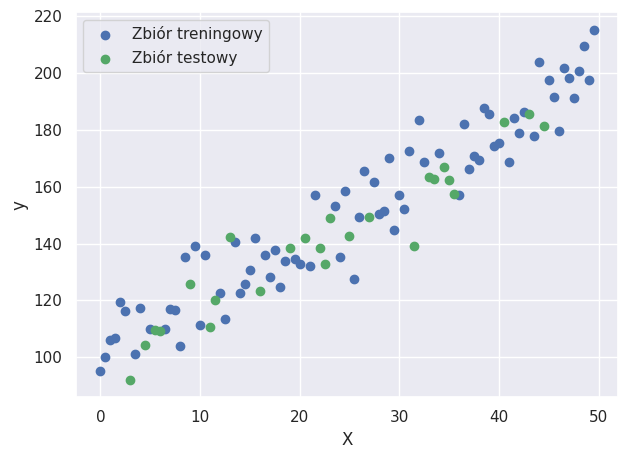

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (7, 5))
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Regresja liniowa

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.97570327]
101.56143732852973


Wizualizacja zbioru treningowego i dopasowanego modelu

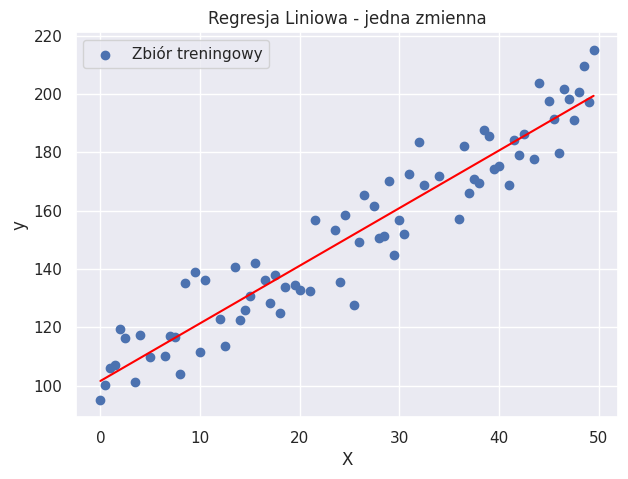

In [65]:
plt.figure(figsize = (7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Wizualizacja zbioru testowego i dopasowanego modelu

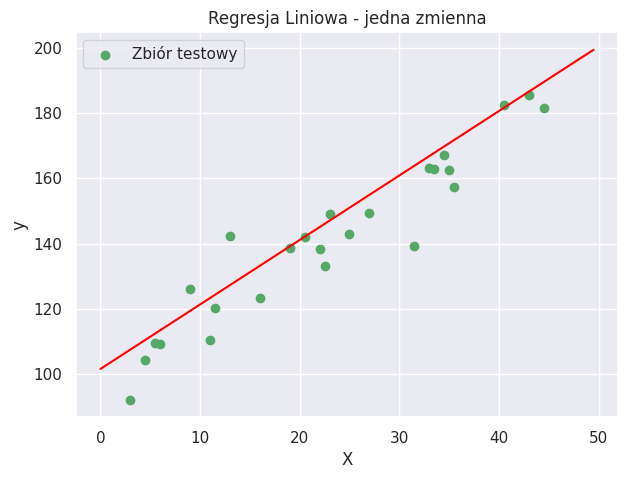

In [67]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize = (7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Ocena modelu

In [68]:
lin_reg.score(X_test, y_test)

0.8617979270081201

In [69]:
lin_reg.score?

Przykład złego zastosowania regresji liniowej

[-0.2125215]
24.063241901357763


Text(0, 0.5, 'y')

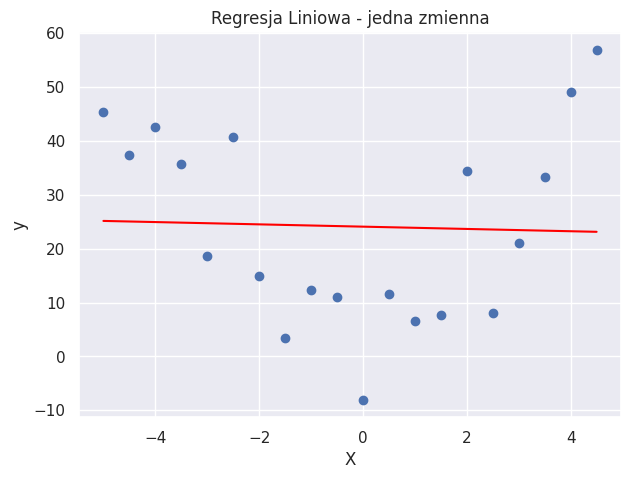

In [71]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize = (7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c = 'red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')